# PlotMovingAverage

用于大致观测趋势。
绘制间隔为$X$的平均值（宽度为$X$的窗口的移动）

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme() # 设置主题,当然我在函数里也加了这句
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error

Text(0.5, 1.0, 'Ads watched (hourly data)')

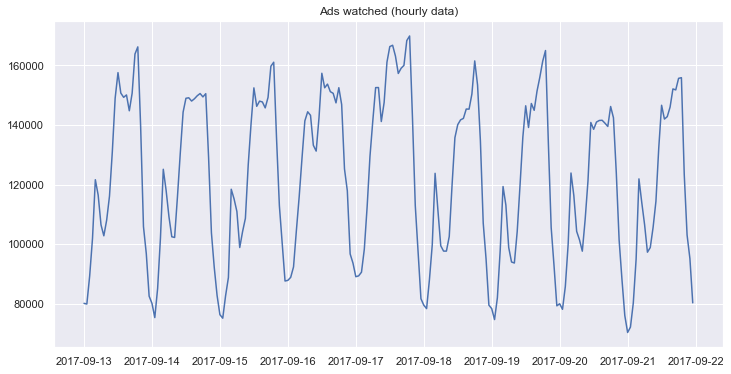

In [11]:
# load data
DATA_PATH = "./data/"
ads = pd.read_csv(DATA_PATH + "ads.csv", index_col=["Time"], parse_dates=["Time"])

plt.figure(figsize=(12,6))
plt.plot(ads.Ads)
plt.title("Ads watched (hourly data)")

In [9]:
def plotMovingAverage(
    series, window, plot_intervals=False, scale=1.96, plot_anomalies=False
):

    """
        series - dataframe with timeseries
        window - rolling window size
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies

    """
    sns.set_theme() # 注意加上效果
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15, 5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")

        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series < lower_bond] = series[series < lower_bond]
            anomalies[series > upper_bond] = series[series > upper_bond]
            plt.plot(anomalies, "ro", markersize=10)

    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

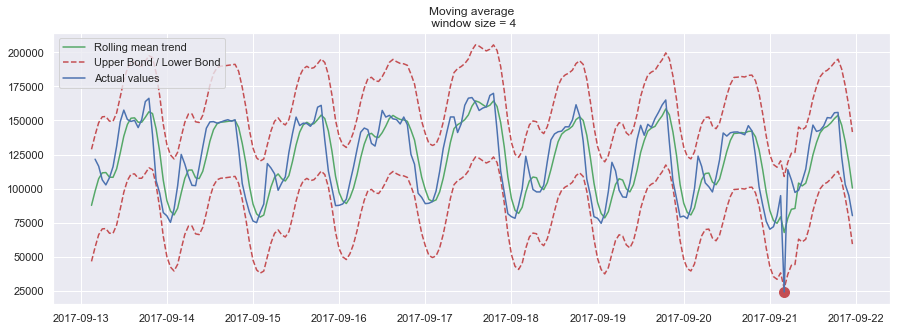

In [10]:
ads_anomaly = ads.copy()
ads_anomaly.iloc[-20] = ads_anomaly.iloc[-20] * 0.2  # 由于数据较为特殊，我们手动把一个数据变得异常
plotMovingAverage(ads_anomaly, 4, plot_intervals=True, plot_anomalies=True)
# 见函数,scale默认为1.96,即上下边界为95%的置信区间